In [3]:
import numpy as np
import random as rd

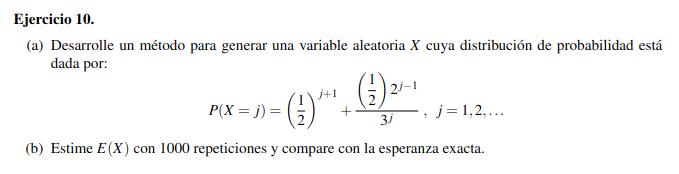

Para poder generar la variable aleatoria X con el metodo de transformada inversa debo poder definir recursivamente la probabilidad para ir aumentando de 1 hasta n. Sean:
$$
q_j = (\frac{1}{2})^{j+1} \quad k_j = \frac{(\frac{1}{2}) 2^{j-1}}{3^j} \quad \\
$$

$$
P(X=1) = q_1 + k_1 = (\frac{1}{2})^2 + \frac{\frac{1}{2}2^0}{3^1} = 0,41 \\
P(X=2) = q_2 + k_2 = q_1 \cdot \frac{1}{2} + k_1 \cdot \frac{2}{3} \\
$$

Y asi sucesivamente, entonces el la estimacion por transformada inversa queda

In [5]:
def transformada_inv_x():
    q_j = 0.25 # j = 1
    k_j = 1/6  # j = 1
    F = q_j + k_j # P(X=1)
    u = rd.random()
    i = 1
    while u >= F:
        i += 1
        q_j *= 0.5
        k_j *= 2/3
        F += q_j + k_j
    return i

In [6]:
def prob_x(j):
    q_j = 0.25 # j = 1
    k_j = 1/6  # j = 1
    F = q_j + k_j # P(X=1)
    for i in range(2, j+1):
        q_j *= 0.5
        k_j *= 2/3
        F += q_j + k_j
    return F

La esperanza exacta esta dada por la siguiente sumatoria:
$$
E(X) = \sum_{j=1}^{\infty} j \cdot P(X=j) = \sum_{j=1}^{\infty} j \cdot (q_j + k_j) = \sum_{j=1}^{\infty} j \cdot (\frac{1}{2})^{j+1} + j \cdot \frac{\frac{1}{2}2^{j-1}}{3^j} = 2.5
$$

In [130]:
def esperanza_x(nsims):
    suma = 0
    for _ in range(nsims):
        suma += transformada_inv_x()
    return suma/nsims

In [136]:
print(esperanza_x(10000))

2.5205
